In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
sys.path.append('/gpfs/commons/home/mgarbulowski/homic_package/src') # to load our package
from homic import file_readers, process_data, make_plots
import seaborn as sns
from collections import Counter

homic package imported


In [2]:
path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/botswana/SRR34978821_blastn.txt'
data1 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/botswana/SRR34978825_blastn.txt'
data2 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/botswana/SRR34978828_blastn.txt'
data3 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

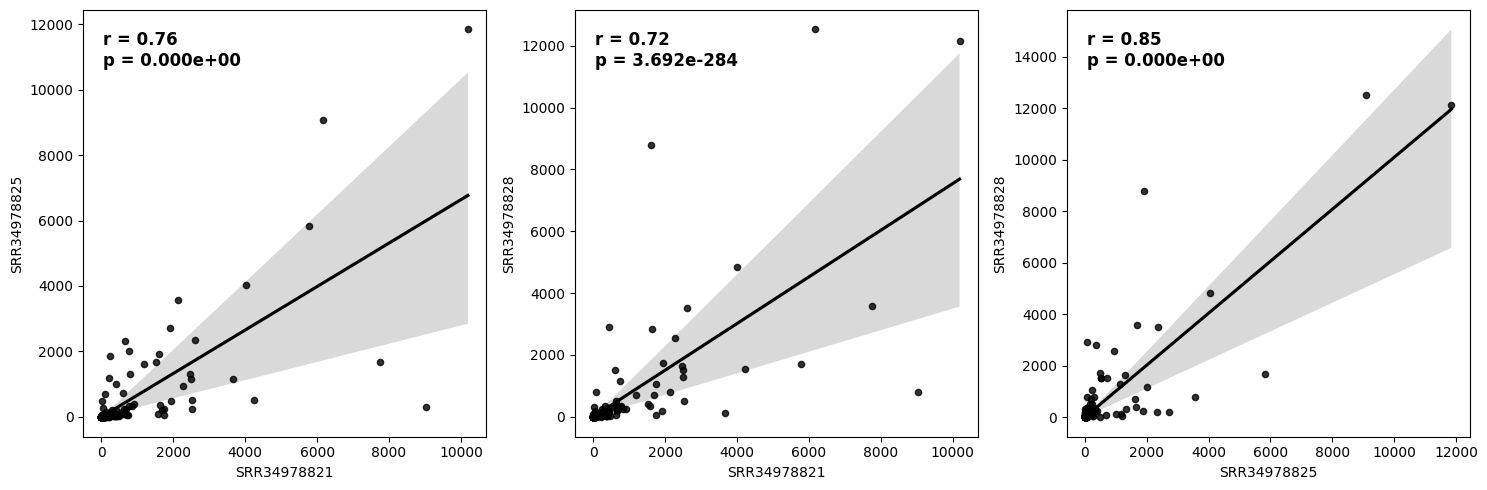

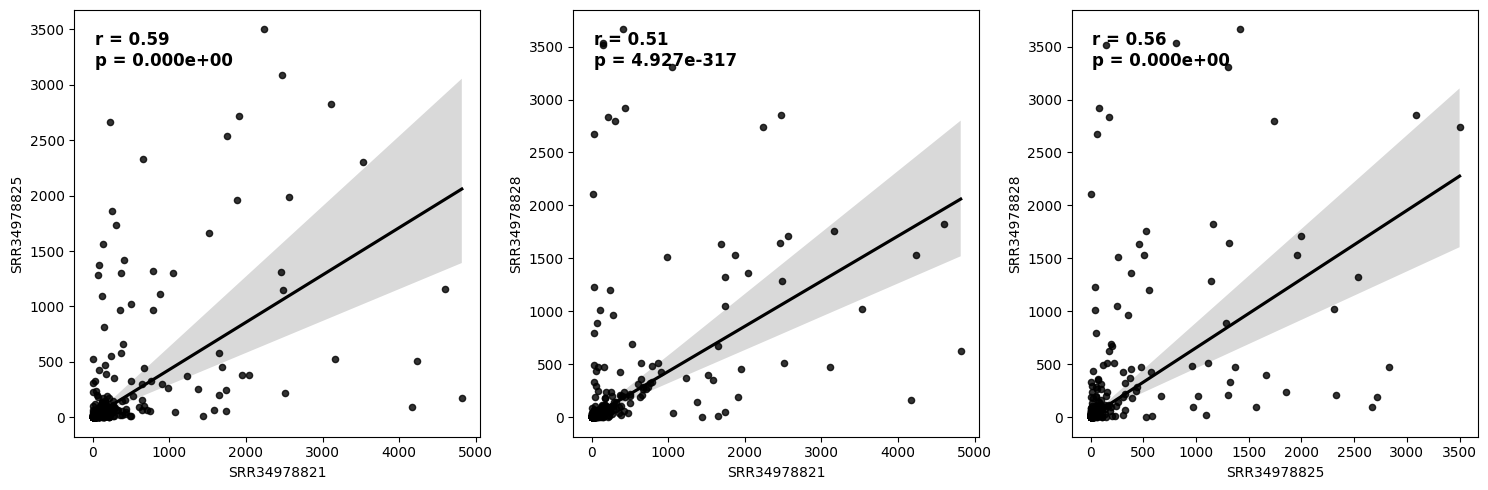

In [3]:
listed_data = [data1, data2, data3]
data_names = ['SRR34978821', 'SRR34978825', 'SRR34978828']

# genus level
make_plots.three_corplots(listed_data, data_names, level="genus")

# species level
make_plots.three_corplots(listed_data, data_names, level="species")

In [4]:
path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/uganda/SRR34978879_blastn.txt'
data11 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/uganda/SRR34978880_blastn.txt'
data22 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/uganda/SRR34978882_blastn.txt'
data33 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

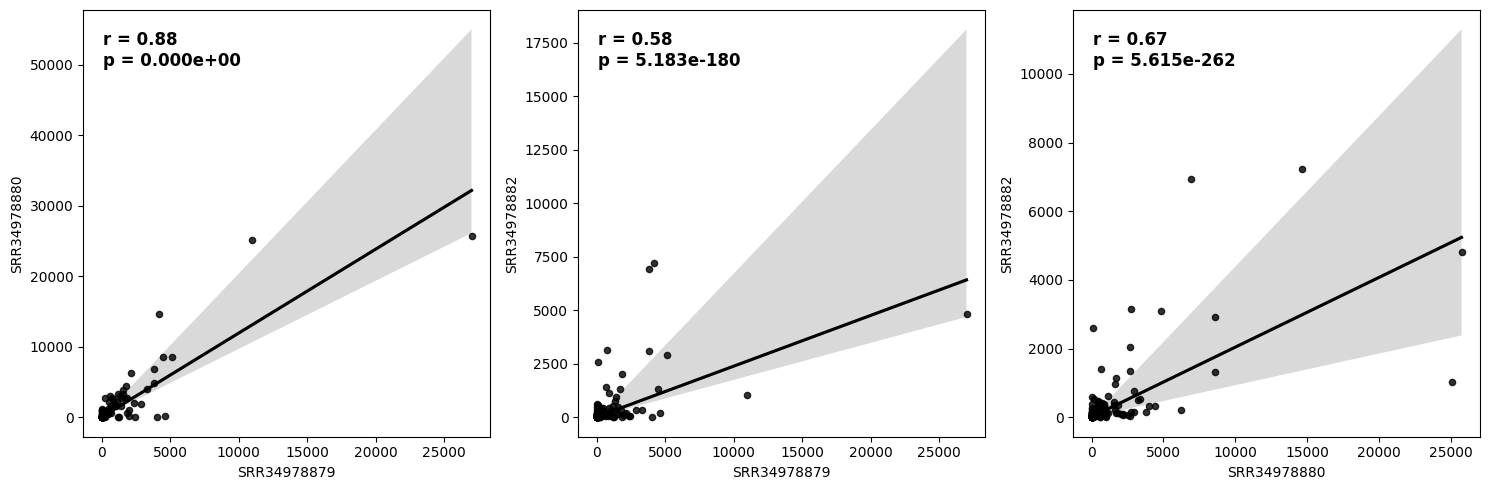

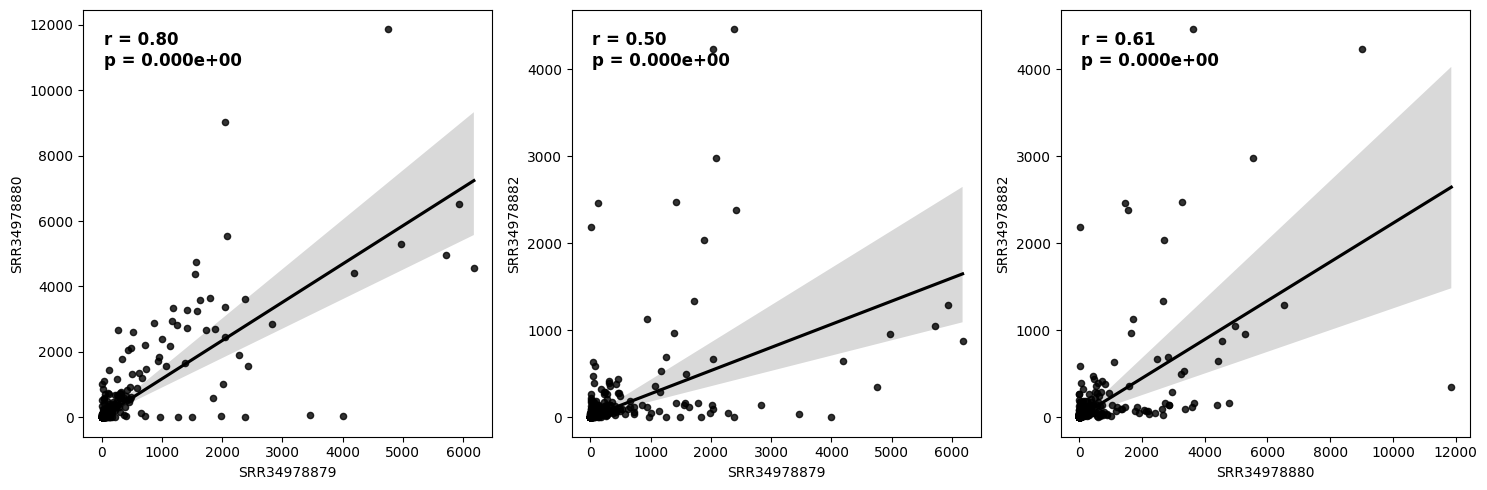

In [5]:
listed_data = [data11, data22, data33]
data_names = ['SRR34978879', 'SRR34978880', 'SRR34978882']

# genus level
make_plots.three_corplots(listed_data, data_names, level="genus")

# species level
make_plots.three_corplots(listed_data, data_names, level="species")

In [6]:
path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/us/SRR34978769_blastn.txt'
data111 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/us/SRR34978773_blastn.txt'
data222 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

path_b = '/gpfs/commons/home/mgarbulowski/data_bi_wgs/us/SRR34978795_blastn.txt'
data333 = process_data.read_n_clean_blastn(path_b, top_hits = True, evalue = 0.05, drop_sp = True)

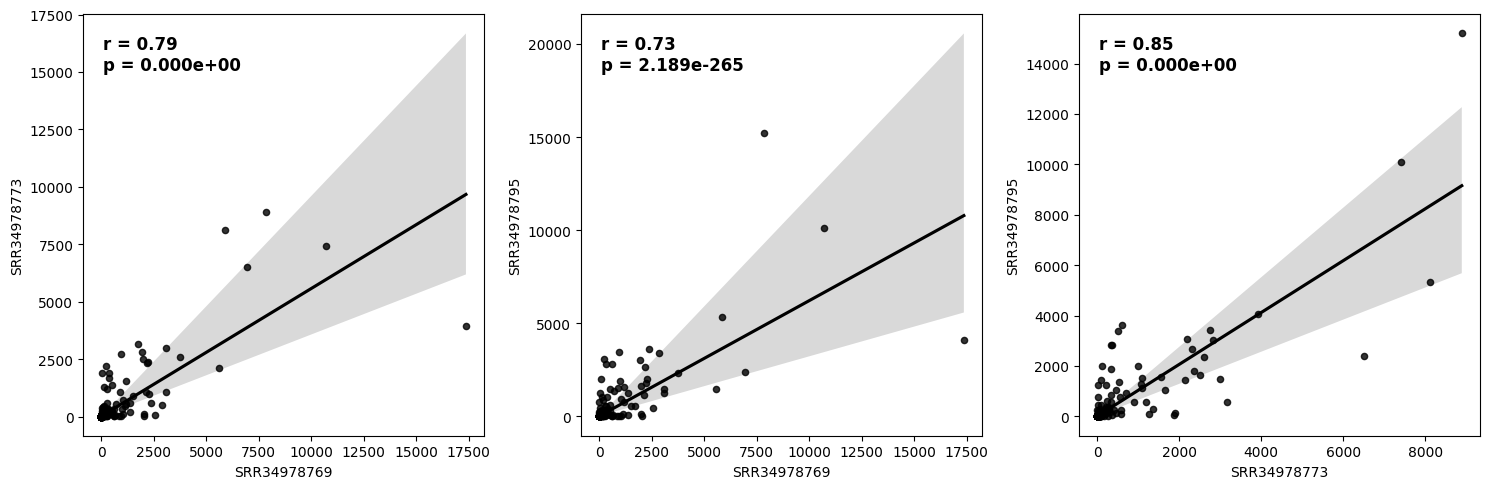

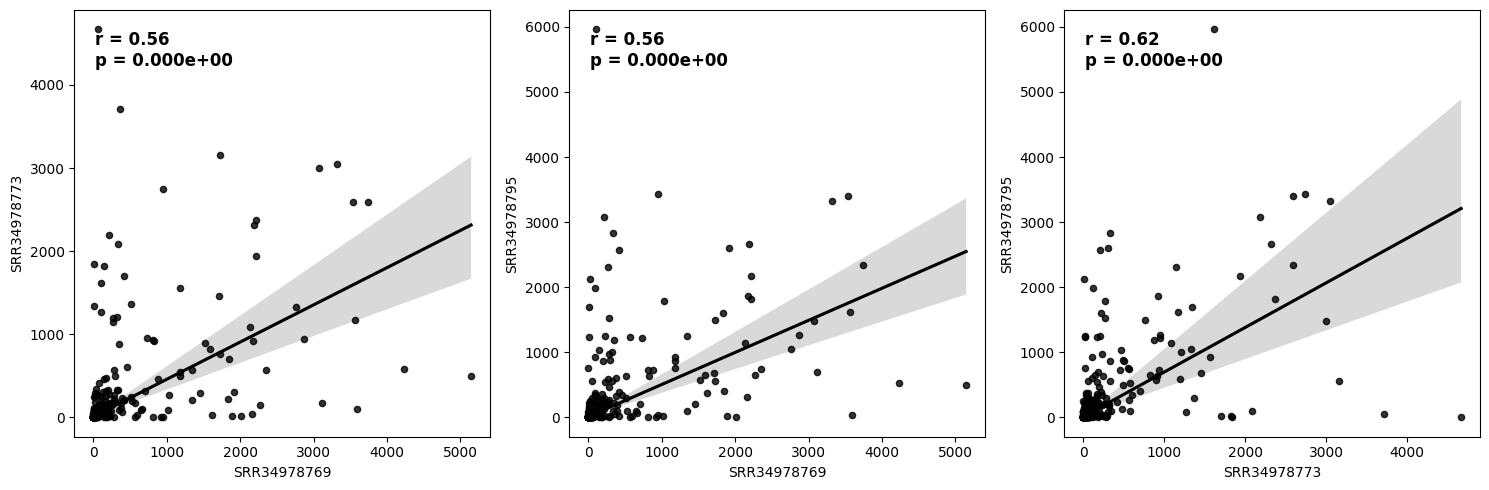

<class 'list'>


In [7]:
listed_data = [data111, data222, data333]
data_names = ['SRR34978769', 'SRR34978773', 'SRR34978795']

# genus level
make_plots.three_corplots(listed_data, data_names, level="genus")

# species level
make_plots.three_corplots(listed_data, data_names, level="species")

In [25]:
listed_data1 = [data1, data2, data3]
listed_data2 = [data11, data22, data33]
listed_data3 = [data111, data222, data333]

# compute counts for each df in a loop
counts1 = [Counter(df["species"]) for df in listed_data1]
counts2 = [Counter(df["species"]) for df in listed_data2]
counts3 = [Counter(df["species"]) for df in listed_data3]
      
# create DataFrame from all counts
df1 = pd.DataFrame(counts1).fillna(0).astype(int)
df2 = pd.DataFrame(counts2).fillna(0).astype(int)
df3 = pd.DataFrame(counts3).fillna(0).astype(int)

df1 = df1.mean(axis=0)
df2 = df2.mean(axis=0)
df3 = df3.mean(axis=0)

df_merged = pd.concat([df1, df2, df3], axis=1, ignore_index=True)
df_merged = df_merged.dropna(how="any")

df_merged.columns = ['Botswana', 'Uganda', 'US']
print(df_merged)

                                Botswana       Uganda           US
Faecalibacterium taiwanense  2804.666667  3908.333333  1778.666667
Segatella hominis            1476.333333  3538.666667     4.333333
Anaerostipes rhamnosivorans    12.000000    43.000000    38.666667
Segatella copri              1873.000000  5101.333333     6.666667
Anaerotruncus colihominis     103.666667   112.333333   226.000000
...                                  ...          ...          ...
Bacillus toyonensis             0.333333     1.333333     0.666667
Pseudomonas poae                0.333333     0.666667     0.666667
Niallia oryzisoli               0.666667     2.666667     1.000000
Occallatibacter riparius        0.333333     1.666667     1.000000
Poriferisphaera corsica         0.666667     0.666667     1.000000

[2984 rows x 3 columns]


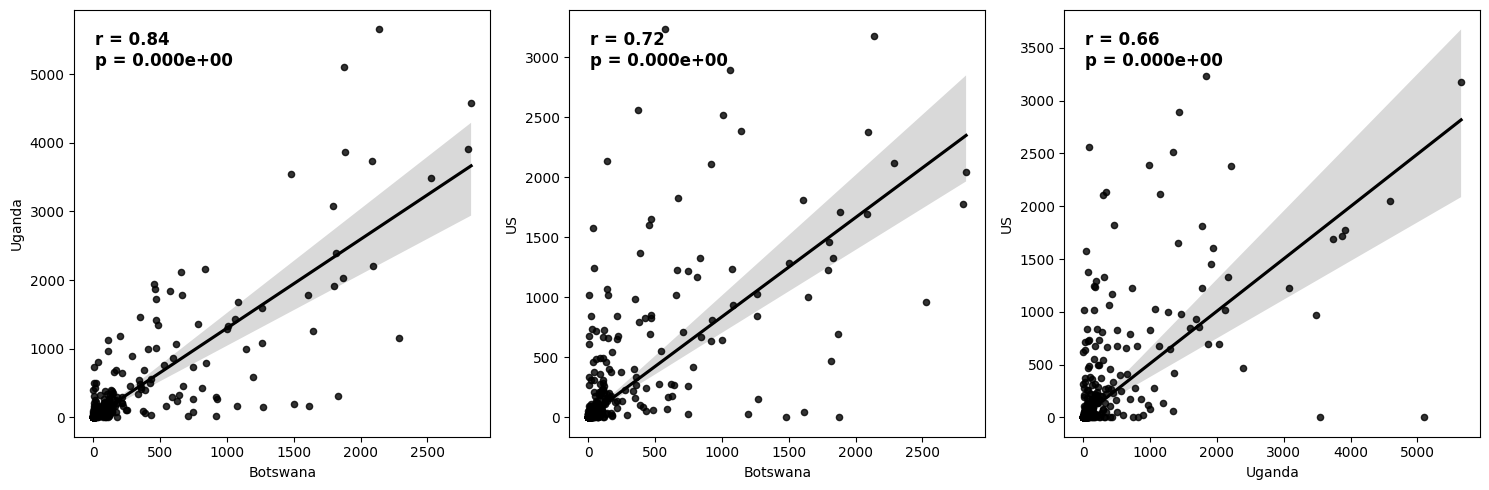

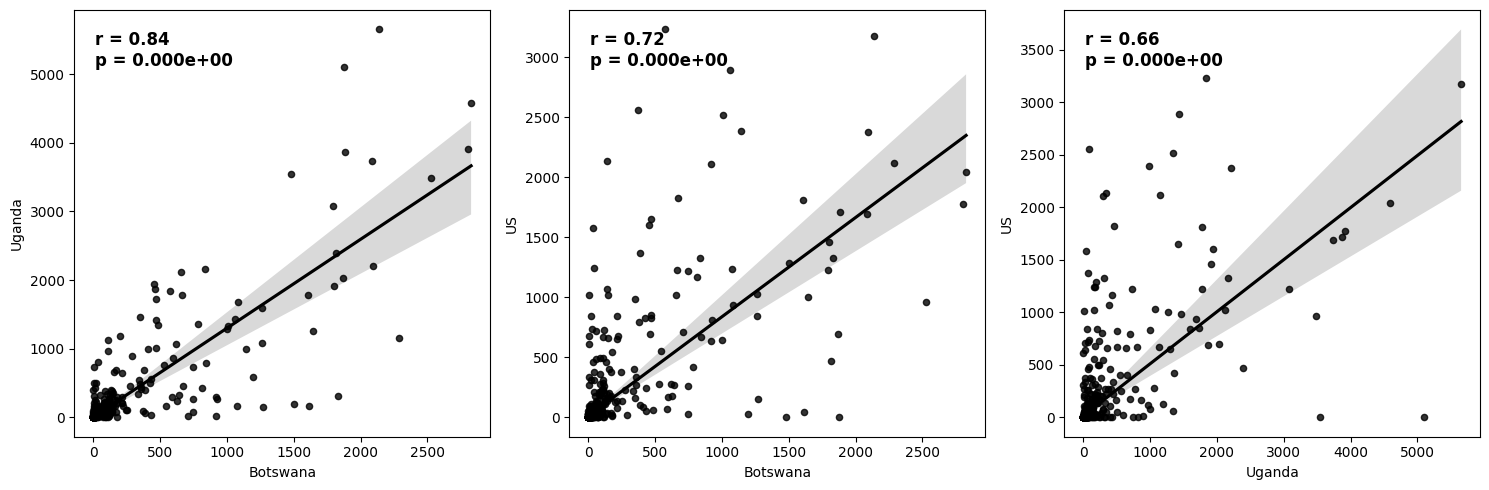

In [26]:
data_names = ['Botswana', 'Uganda', 'US']

# genus level
make_plots.three_corplots(df_merged, data_names, level="genus")

# species level
make_plots.three_corplots(df_merged, data_names, level="species")

In [49]:
df_merged_all = df_merged.mean(axis=1)

df_merged_all = df_merged_all.sort_values(ascending=False)
n = 10
print(df_merged_all.head(n).index.to_list())

['Faecalibacterium taiwanense', 'Segatella hominis', 'Anaerostipes rhamnosivorans', 'Segatella copri', 'Anaerotruncus colihominis', 'Blautia hansenii', 'Candidatus Faecalibacterium', 'Roseburia intestinalis', 'Butyricimonas faecihominis', '[Ruminococcus] torques']
['Blautia wexlerae', 'Faecalibacterium wellingii', 'Faecalibacterium taiwanense', 'Faecalibacterium duncaniae', 'Faecalibacterium prausnitzii', 'Segatella copri', 'Vescimonas coprocola', 'Clostridiales bacterium', 'Faecalibacterium hominis', 'Blautia massiliensis']


In [47]:
bacteria_list = [
    "Blautia argi",
    "Anaerocolumna cellulosilytica",
    "Akkermansia muciniphila",
    "[Clostridium] scindens",
    "Selenomonas ruminantium",
    "Clostridium beijerinckii",
    "Parabacteroides distasonis",
    "Flavonifractor plautii",
    "Phocaeicola vulgatus",
    "Anaerobutyricum hallii",
    "Enterococcus faecalis",
    "Hungatella hathewayi",
    "Clostridium perfringens",
    "Muribaculum gordoncarteri",
    "Butyrivibrio fibrisolvens",
    "Roseburia hominis",
    "Oscillibacter valericigenes",
    "Roseburia intestinalis",
    "Enterococcus faecium",
    "Bacteroides thetaiotaomicron",
    "Blautia pseudococcoides",
    "Massilistercora timonensis",
    "Anaerostipes caccae",
    "Duncaniella dubosii",
    "Blautia producta",
    "Ruminococcus bicirculans",
    "Anaerostipes rhamnosivorans",
    "Pseudobutyrivibrio xylanivorans",
    "Clostridium baratii",
    "[Eubacterium] eligens",
    "Clostridium septicum",
    "Clostridium isatidis",
    "Bacteroides ovatus",
    "Bacteroides caecimuris",
    "Bacteroides xylanisolvens",
    "Sodaliphilus pleomorphus",
    "Lactobacillus johnsonii",
    "[Clostridium] hylemonae",
    "Lachnoclostridium phocaeense",
    "Coprococcus comes",
    "Blautia obeum",
    "Clostridium butyricum",
    "Longicatena caecimuris",
    "Eubacterium limosum",
    "Muribaculum intestinale",
    "Barnesiella viscericola",
    "Enterocloster bolteae",
    "Coprococcus catus",
    "Clostridioides difficile",
    "Anaerocolumna sedimenticola",
    "Turicibacter sanguinis",
    "Bacteroides fragilis",
    "Butyrivibrio hungatei",
    "Anaerostipes hadrus",
    "Eubacterium maltosivorans",
    "Intestinimonas butyriciproducens",
    "Enterocloster clostridioformis",
    "Ruminococcus albus",
    "[Ruminococcus] torques",
    "Dysosmobacter welbionis",
    "Acutalibacter muris",
    "Faecalibacterium prausnitzii",
    "[Ruminococcus] gnavus",
    "Ruthenibacterium lactatiformans",
    "Herbinix luporum",
]


In [48]:
set1, set2 = set(df_merged_all.head(n).index.to_list()), set(bacteria_list)

# Find overlap
common = set1 & set2
overlap_count = len(common)

# Compute percentage agreement relative to each list
percent_in_list1 = (overlap_count / len(set1)) * 100
percent_in_list2 = (overlap_count / len(set2)) * 100

print(f"Common elements: {common}")
print(f"Agreement: {overlap_count} elements")
print(f"Overlap relative to list1: {percent_in_list1:.2f}%")
print(f"Overlap relative to list2: {percent_in_list2:.2f}%")

Common elements: {'Ruminococcus bicirculans', 'Blautia obeum', 'Phocaeicola vulgatus', 'Blautia producta', 'Enterococcus faecalis', 'Coprococcus comes', 'Bacteroides ovatus', 'Bacteroides fragilis', 'Oscillibacter valericigenes', 'Bacteroides xylanisolvens', 'Eubacterium limosum', 'Roseburia hominis', 'Hungatella hathewayi', 'Clostridium perfringens', 'Anaerostipes rhamnosivorans', 'Bacteroides caecimuris', '[Clostridium] scindens', 'Eubacterium maltosivorans', 'Clostridium beijerinckii', 'Enterococcus faecium', 'Faecalibacterium prausnitzii', 'Pseudobutyrivibrio xylanivorans', 'Anaerostipes hadrus', 'Muribaculum intestinale', 'Clostridium isatidis', 'Sodaliphilus pleomorphus', 'Parabacteroides distasonis', 'Ruminococcus albus', 'Intestinimonas butyriciproducens', '[Ruminococcus] torques', 'Clostridium butyricum', 'Anaerocolumna cellulosilytica', 'Anaerocolumna sedimenticola', 'Lactobacillus johnsonii', 'Blautia argi', 'Anaerobutyricum hallii', 'Clostridioides difficile', 'Enterocloste